# Assignment 6: Exercise 1

Plot the Sharpe ratio on the optimal portfolio as a function of the risk-aversion level.


 The tangency portfolio is: 
[0.6086 0.2029 0.1885]

 Its expected return, variance and Sharpe Ratio is: 
0.1073
0.0165
0.4463

 The zero-beta portfolio is: 
[ 1.4236 -0.1945 -0.2291]

 Its expected return, variance and Sharpe Ratio is: 
0.05
0.0241
-0.0

 The cut-off level of risk-aversion below which the investor is constrained is: 
2.6762

  
3.479105928085519

  
[2.11734694 0.70578231 0.65597668]

  
[-1.1510293  0.5611639  0.5898654]
[1.22125891 0.054038   0.02470309]

  
1.412247616856895
0.7723006600364616


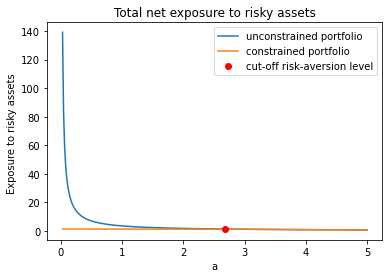

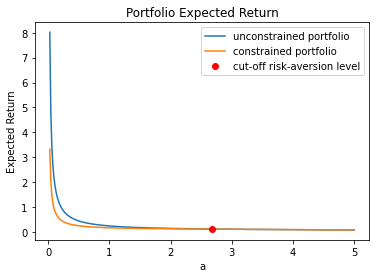

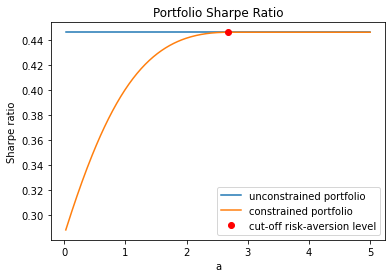

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu    = np.array([0.08, 0.14, 0.16])
sigma = np.array([0.1, 0.30, 0.35])
ones=np.ones(3)
rho   = 0.2
R0    = 0.05
m     = 1.30
cov   = np.array([[sigma[0]**2,rho*sigma[0]*sigma[1],rho*sigma[0]*sigma[2]],\
                  [rho*sigma[0]*sigma[1],sigma[1]**2,rho*sigma[1]*sigma[2]],\
                  [rho*sigma[2]*sigma[0],rho*sigma[2]*sigma[1],sigma[2]**2]])



# Grid of levels of risk aversion
a = np.linspace(0.025,5,300)

# Auxiliary calculation
vec1 = np.ones(3)
cov_inv = np.linalg.inv(cov)

A = vec1.transpose()@(cov_inv@vec1)
B = vec1.transpose()@(cov_inv@mu)
C = mu.transpose()@(cov_inv@mu)
DELTA = A*C-B**2

# Tangency portfolio
w_t    = (cov_inv@(mu-R0*vec1))/(B-A*R0)
mu_t   = w_t.transpose()@mu
sig2_t = w_t.transpose()@(cov@w_t)
SR_t   = (mu_t-R0)/np.sqrt(sig2_t)

# Zero-beta portfolio
lda_z  = (C-R0*B)/DELTA
gam_z  = (R0*A-B)/DELTA

w_z    = lda_z*(cov_inv@vec1)+gam_z*(cov_inv@mu)
mu_z   = w_z.transpose()@mu
sig2_z = w_z.transpose()@(cov@w_z)
SR_z   = (mu_z-R0)/np.sqrt(sig2_z)

print('\n The tangency portfolio is: ')
print(np.around(w_t,4))

print('\n Its expected return, variance and Sharpe Ratio is: ')
print(np.around(mu_t,4))
print(np.around(sig2_t,4))
print(np.around(SR_t,4))

print('\n The zero-beta portfolio is: ')
print(np.around(w_z,4))

print('\n Its expected return, variance and Sharpe Ratio is: ')
print(np.around(mu_z,4))
print(np.around(sig2_z,4))
print(np.around(SR_z,4))



# Cut-off risk-aversion level such that the agent is unconstrained
a_star   = SR_t/(m*np.sqrt(sig2_t))
bool_unc = (a>=a_star)

print('\n The cut-off level of risk-aversion below which the investor is constrained is: ')
print(np.around(a_star,4))

# Fractions invested in tangency and zero-beta portfolio
x_t_unc = np.divide(SR_t/np.sqrt(sig2_t),a)
x_z_unc = np.zeros(len(a))

x_t_con = np.divide((mu_t-mu_z)/(sig2_t+sig2_z),a)+m*sig2_z/(sig2_t+sig2_z)
x_z_con = np.divide(-(mu_t-mu_z)/(sig2_t+sig2_z),a)+m*sig2_t/(sig2_t+sig2_z)

x_t = np.multiply(x_t_unc,bool_unc)+np.multiply(x_t_con,1-bool_unc)
x_z = np.multiply(x_z_unc,bool_unc)+np.multiply(x_z_con,1-bool_unc)

print('\n  ')
print(SR_t/np.sqrt(sig2_t))
print('\n  ')
print(cov_inv@(mu-R0*vec1))
print('\n  ')
print(np.multiply((mu_t-mu_z)/(sig2_t+sig2_z),w_t)+np.multiply(-(mu_t-mu_z)/(sig2_t+sig2_z),w_z))
print(np.multiply(m*sig2_z/(sig2_t+sig2_z),w_t)+np.multiply(m*sig2_t/(sig2_t+sig2_z),w_z))
print('\n  ')
print((mu_t-mu_z)/(sig2_t+sig2_z))
print(m*sig2_z/(sig2_t+sig2_z))

# Optimal portfolio
mu_star  = (C-B*R0)/a_star+(1-(B-A*R0)/a_star)*R0
mu_unc   = np.divide(C-B*R0,a)+(1-np.divide(B-A*R0,a))*R0
mu_con   = R0+x_t*(mu_t-R0)
sig2_con = x_t**2*sig2_t+x_z**2*sig2_z
SR_con   = np.divide(mu_con-R0,np.sqrt(sig2_con))

SR_p = np.multiply(SR_t,bool_unc)+np.multiply(SR_con,1-bool_unc)

# Optimal constrained portfolio
plt.plot(a,x_t_unc,label='unconstrained portfolio')
plt.plot(a,x_t+x_z,label='constrained portfolio')
plt.plot(a_star,m,'ro',label='cut-off risk-aversion level')
plt.title('Total net exposure to risky assets')
plt.xlabel('a')
plt.ylabel('Exposure to risky assets ')
plt.legend()
plt.show()

plt.plot(a,mu_unc,label='unconstrained portfolio')
plt.plot(a,mu_con,label='constrained portfolio')
plt.plot(a_star,mu_star,'ro',label='cut-off risk-aversion level')
plt.title('Portfolio Expected Return')
plt.xlabel('a')
plt.ylabel('Expected Return')
plt.legend()
plt.show()

plt.plot(a,SR_t*np.ones(len(a)),label='unconstrained portfolio')
plt.plot(a,SR_con,label='constrained portfolio')
plt.plot(a_star,SR_t,'ro',label='cut-off risk-aversion level')
plt.title('Portfolio Sharpe Ratio')
plt.xlabel('a')
plt.ylabel('Sharpe ratio')
plt.legend()
plt.show()



According to the graph, we can see that the falling in a bellow a* leads to the drop in the Sharp ratio of the portfolio.